In [2]:
import os
import csv
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
folders = [x[0] for x in os.walk('images')][1:]

In [4]:
images = []
# Added resize because Kernel is dying
image_size = (20, 20)
for folder in folders:
    with open(folder+'/filelist_LBP.txt', 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        for img_name, left, top, right, bottom, new_size_y, new_size_x in reader:
            img = Image.open(folder+'/'+img_name).resize((int(new_size_y), int(new_size_x))).crop((int(left), int(top), int(right), int(bottom))).resize(image_size)
            
            # some images are black and white, for PCA to work correctly need to convert those to rgb
            if (len(np.array(img).shape) != 3 or np.array(img).shape[2] != 3):
                rgbimg = Image.new("RGB", img.size)
                rgbimg.paste(img)
                images.append(rgbimg)
            else:
                images.append(img)
            if (len(np.array(images[-1]).shape) != 3 or np.array(images[-1]).shape[2] != 3):
                print ("Image was not processed correctly " + folder + '/' + img_name)

Showing few random faces from the dataset.

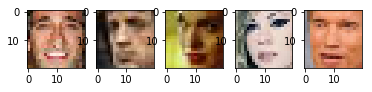

In [5]:
num_faces = 5

for i in range(1, num_faces+1):
    img = random.choice(images)
    plt.subplot(2, num_faces, i)
    plt.imshow(img)

### Implementing eigenfaces with SVD

Implement eigenfaces using singular value decomposition (SVD). Remember to represent the images properly and account for the color.

In [6]:
adjusted_shape = image_size + (3,)

In [7]:
# =============== TODO: Your code here ===============
# Represent the images as a matrix for SVD decompotision.
flat_images_shape = (adjusted_shape[0] * adjusted_shape[1] * adjusted_shape[2])
X = np.reshape(np.array([np.asarray(image) for image in images]), (len(images), flat_images_shape))
# ====================================================

In [8]:
num_faces = 10

In [9]:
mean_face = np.mean(X, axis=0)
X = X - mean_face

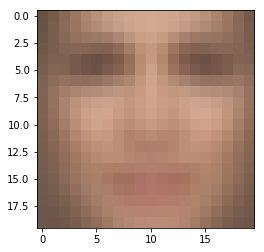

In [10]:
plt.imshow(np.array(mean_face, dtype='uint8').reshape(adjusted_shape))

In [14]:
!pip install sklearn

    100% |████████████████████████████████| 8.0MB 1.6MB/s ta 0:00:011
  Stored in directory: /Users/sasha/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
# =============== TODO: Your code here ===============
# Implement eigenfaces using singular value decomposition (SVD). 
# Remember to represent the images properly and account for the color.
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = num_faces)
cov = np.cov(X.T)
svd.fit(cov)
eigenvectors = svd.components_ * 255

# ====================================================

Visualize 10 eigenfaces associated with the highest eigenvalues.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

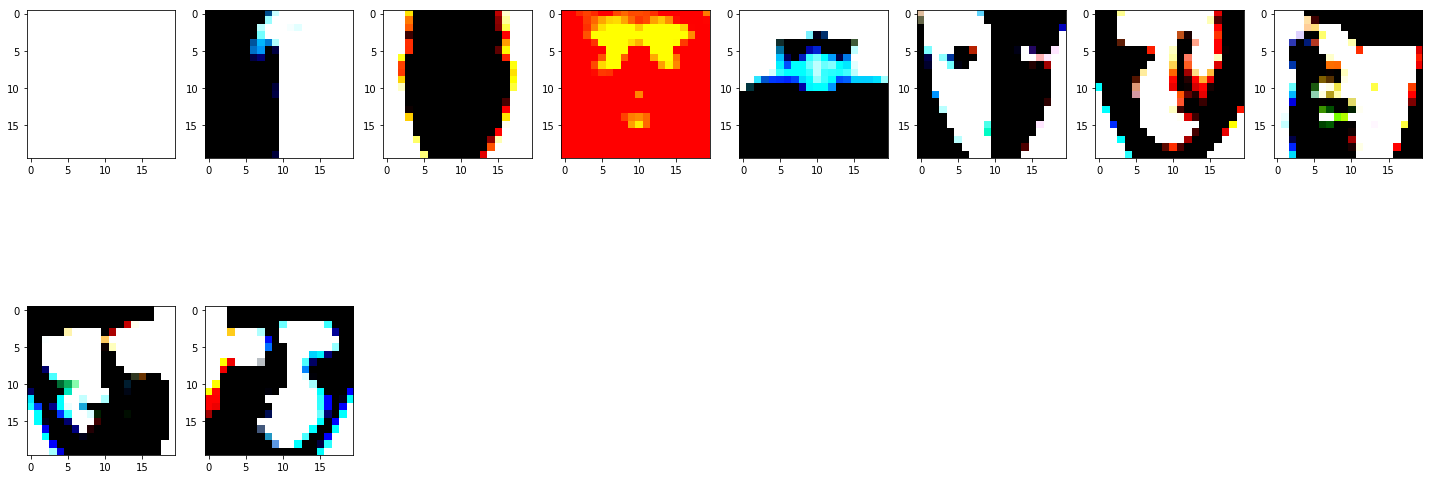

In [15]:
# =============== TODO: Your code here ===============
# Visualize 10 eigenfaces associated with the highest eigenvalues.
plt.figure(figsize=[25,10])
for i in range(1, num_faces+1):
    img = eigenvectors[i - 1]
    plt.subplot(2, 8, i)
    plt.imshow(np.array(img).reshape(adjusted_shape))
# ====================================================

### Implementing eigenfaces with variance maximization

As you have noticed, SVD could be quite slow if the number of faces is large. If the number of faces exceeds 50k, which is not a large dataset according to the modern standards, doing SVD is not possible directly and you have to use iterative methods for computing eigenfaces.

Here, you are going to calculate 10 eigenfaces by maximizing variance as stated in the lecture notes.

In [18]:
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def power_iteration(A):
    n, d = A.shape

    v = np.ones(d) / np.sqrt(d)
    ev = eigenvalue(A, v)

    while True:
        Av = A.dot(v)
        v_new = Av / np.linalg.norm(Av)

        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < 0.01:
            break

        v = v_new
        ev = ev_new

    return ev_new, v_new

In [20]:
eigenvectors

array([[  8.62219729,   7.67508529,   6.74873735, ...,   5.24962477,
          4.97525658,   4.59916462],
       [ -8.29662432,  -6.66802393,  -5.40500543, ...,   7.79334505,
          6.29068759,   5.2251215 ],
       [ 12.47094695,  11.07251328,   9.53299552, ...,  16.65577692,
         14.05943447,  11.75381098],
       ...,
       [ 10.3381259 ,   9.14814016,   8.69289653, ..., -12.79833317,
        -13.30163601, -12.60149755],
       [ -8.44371485,  -6.43800228,  -4.83197693, ...,   5.63377718,
          4.54095574,   4.36963656],
       [ 14.87868306,  11.95958959,   9.61757648, ...,  19.94684862,
         21.77329907,  21.53068551]])

In [49]:
# =============== TODO: Your code here ===============
# Calculate 10 eigenfaces iteratively by variance maximization.
A = cov 
iter_eigenvectors = []
for i in range(10):
    
    eigval, eigvec = power_iteration(A)
    A = A - eigval * np.dot(eigvec.reshape(-1, 1), eigvec.reshape(1, -1))
    eigvec = eigvec * 255
    iter_eigenvectors.append(eigvec)
    
    
# ====================================================

In [50]:
iter_eigenvectors

[array([8.62125665, 7.67432929, 6.74812454, ..., 5.25050825, 4.97596971,
        4.59975695]),
 array([-8.29911755, -6.67024794, -5.40695101, ...,  7.79115075,
         6.28873025,  5.22340022]),
 array([-12.46874816, -11.07162239,  -9.53300849, ..., -16.6563382 ,
        -14.06073215, -11.75558436]),
 array([ 6.95870722, -0.80287923, -6.01631922, ...,  4.44773264,
        -2.57537549, -7.21621572]),
 array([-14.19543605, -12.06846429, -10.18179777, ...,   5.80064298,
          5.22328624,   4.82339248]),
 array([ -0.84440747,  -0.7179583 ,  -0.59791152, ..., -13.14594081,
        -11.06869819,  -9.70964213]),
 array([-0.55609608, -0.33870345, -0.05761496, ..., 14.37225105,
        10.86904536,  8.80274863]),
 array([-10.34994654,  -9.15730871,  -8.7001528 , ...,  12.77936827,
         13.28788866,  12.59153967]),
 array([-8.3789772 , -6.38444144, -4.78650306, ...,  5.66826458,
         4.58085711,  4.4105011 ]),
 array([14.95625178, 12.01994109,  9.66105276, ..., 19.99922216,
        

Visualize 10 eigenfaces learned by variance maximization. Compare them with SVG generated eigenfaces. 

In [ ]:
# =============== TODO: Your code here ===============
# Visualize 10 eigenfaces learned by variance maximization. Compare them with SVG generated eigenfaces.


# ====================================================